# Step 3: PCA Dimensionality Reduction

This notebook applies Principal Component Analysis (PCA) to reduce the dimensionality of normalized audio features across all datasets.

## Objectives:
1. Load normalized datasets (GTZAN, FMA Small, FMA Medium, Indian, Instrumental)
2. Apply PCA to reduce features while retaining 95% variance
3. Analyze explained variance ratios
4. Visualize PCA results in 2D and 3D
5. Save transformed data for clustering

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import os
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

print("✓ Libraries imported successfully!")

✓ Libraries imported successfully!


In [3]:
# Define paths
normalization_dir = '../results/normalization/'
pca_output_dir = '../results/pca/'
os.makedirs(pca_output_dir, exist_ok=True)

# Dataset configurations
datasets = {
    'gtzan': {
        'file': 'gtzan_normalized.csv',
        'label_file': 'gtzan_labels.csv',
        'name': 'GTZAN'
    },
    'fma_small': {
        'file': 'fma_small_normalized.csv',
        'label_file': 'fma_small_labels.csv',
        'name': 'FMA Small'
    },
    'fma_medium': {
        'file': 'fma_medium_normalized.csv',
        'label_file': 'fma_medium_labels.csv',
        'name': 'FMA Medium'
    },
    'indian': {
        'file': 'indian_normalized.csv',
        'label_file': 'indian_labels.csv',
        'name': 'Indian Music'
    }
}

print(f"Output directory: {pca_output_dir}")
print(f"Datasets to process: {list(datasets.keys())}")

Output directory: ../results/pca/
Datasets to process: ['gtzan', 'fma_small', 'fma_medium', 'indian']


## Function Definitions

In [4]:
def apply_pca(data, n_components=0.95):
    """
    Apply PCA to the data
    
    Parameters:
    - data: DataFrame with features
    - n_components: Number of components or variance ratio to retain
    
    Returns:
    - pca_data: Transformed data
    - pca_model: Fitted PCA model
    """
    pca = PCA(n_components=n_components)
    pca_data = pca.fit_transform(data)
    
    return pca_data, pca

def plot_explained_variance(pca, dataset_name, output_dir):
    """
    Plot cumulative explained variance
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    
    # Individual explained variance
    ax1.bar(range(1, len(pca.explained_variance_ratio_) + 1), 
            pca.explained_variance_ratio_, 
            alpha=0.7, color='steelblue')
    ax1.set_xlabel('Principal Component', fontsize=12)
    ax1.set_ylabel('Explained Variance Ratio', fontsize=12)
    ax1.set_title(f'{dataset_name}: Explained Variance by Component', fontsize=14, fontweight='bold')
    ax1.grid(alpha=0.3)
    
    # Cumulative explained variance
    cumsum = np.cumsum(pca.explained_variance_ratio_)
    ax2.plot(range(1, len(cumsum) + 1), cumsum, 
             marker='o', linestyle='-', color='darkred', linewidth=2)
    ax2.axhline(y=0.95, color='green', linestyle='--', label='95% Variance')
    ax2.set_xlabel('Number of Components', fontsize=12)
    ax2.set_ylabel('Cumulative Explained Variance', fontsize=12)
    ax2.set_title(f'{dataset_name}: Cumulative Explained Variance', fontsize=14, fontweight='bold')
    ax2.legend()
    ax2.grid(alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(f'{output_dir}{dataset_name.lower().replace(" ", "_")}_explained_variance.png', 
                dpi=300, bbox_inches='tight')
    plt.show()
    
    return cumsum

def plot_pca_2d(pca_data, labels, dataset_name, output_dir):
    """
    Plot 2D PCA visualization
    """
    plt.figure(figsize=(12, 8))
    
    unique_labels = labels.unique()
    colors = plt.cm.tab20(np.linspace(0, 1, len(unique_labels)))
    
    for idx, label in enumerate(unique_labels):
        mask = labels == label
        plt.scatter(pca_data[mask, 0], pca_data[mask, 1], 
                   c=[colors[idx]], label=label, alpha=0.6, s=50)
    
    plt.xlabel(f'First Principal Component', fontsize=12)
    plt.ylabel(f'Second Principal Component', fontsize=12)
    plt.title(f'{dataset_name}: PCA Visualization (2D)', fontsize=14, fontweight='bold')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.savefig(f'{output_dir}{dataset_name.lower().replace(" ", "_")}_pca_2d.png', 
                dpi=300, bbox_inches='tight')
    plt.show()

def plot_pca_3d(pca_data, labels, dataset_name, output_dir):
    """
    Plot 3D PCA visualization
    """
    fig = plt.figure(figsize=(12, 9))
    ax = fig.add_subplot(111, projection='3d')
    
    unique_labels = labels.unique()
    colors = plt.cm.tab20(np.linspace(0, 1, len(unique_labels)))
    
    for idx, label in enumerate(unique_labels):
        mask = labels == label
        ax.scatter(pca_data[mask, 0], pca_data[mask, 1], pca_data[mask, 2],
                  c=[colors[idx]], label=label, alpha=0.6, s=30)
    
    ax.set_xlabel('PC1', fontsize=11)
    ax.set_ylabel('PC2', fontsize=11)
    ax.set_zlabel('PC3', fontsize=11)
    ax.set_title(f'{dataset_name}: PCA Visualization (3D)', fontsize=14, fontweight='bold')
    ax.legend(bbox_to_anchor=(1.15, 1), loc='upper left', fontsize=8)
    
    plt.tight_layout()
    plt.savefig(f'{output_dir}{dataset_name.lower().replace(" ", "_")}_pca_3d.png', 
                dpi=300, bbox_inches='tight')
    plt.show()

print("✓ Functions defined successfully!")

✓ Functions defined successfully!


## Process All Datasets

In [5]:
# Store results
pca_results = {}

for key, config in datasets.items():
    print(f"\n{'='*60}")
    print(f"Processing: {config['name']}")
    print(f"{'='*60}")
    
    # Load normalized data
    data_path = os.path.join(normalization_dir, config['file'])
    label_path = os.path.join(normalization_dir, config['label_file'])
    
    try:
        df = pd.read_csv(data_path)
        labels_df = pd.read_csv(label_path)
        
        print(f"✓ Loaded {config['name']}: {df.shape}")
        print(f"  Features: {df.shape[1]}")
        print(f"  Samples: {df.shape[0]}")
        
        # Apply PCA (95% variance)
        pca_data, pca_model = apply_pca(df, n_components=0.95)
        
        print(f"\n✓ PCA Applied:")
        print(f"  Original dimensions: {df.shape[1]}")
        print(f"  Reduced dimensions: {pca_data.shape[1]}")
        print(f"  Total variance explained: {pca_model.explained_variance_ratio_.sum():.4f}")
        print(f"  Variance retained: {pca_model.explained_variance_ratio_.sum() * 100:.2f}%")
        
        # Store results
        pca_results[key] = {
            'data': pca_data,
            'model': pca_model,
            'labels': labels_df.iloc[:, 0],
            'original_shape': df.shape,
            'reduced_shape': pca_data.shape
        }
        
        # Save PCA-transformed data
        pca_df = pd.DataFrame(
            pca_data,
            columns=[f'PC{i+1}' for i in range(pca_data.shape[1])]
        )
        output_file = f'{pca_output_dir}{key}_pca.csv'
        pca_df.to_csv(output_file, index=False)
        print(f"✓ Saved to: {output_file}")
        
    except Exception as e:
        print(f"✗ Error processing {config['name']}: {str(e)}")
        continue

print(f"\n{'='*60}")
print("PCA Processing Complete!")
print(f"{'='*60}")


Processing: GTZAN
✓ Loaded GTZAN: (999, 69)
  Features: 69
  Samples: 999

✓ PCA Applied:
  Original dimensions: 69
  Reduced dimensions: 39
  Total variance explained: 0.9505
  Variance retained: 95.05%
✓ Saved to: ../results/pca/gtzan_pca.csv

Processing: FMA Small
✓ Loaded FMA Small: (7997, 70)
  Features: 70
  Samples: 7997

✓ PCA Applied:
  Original dimensions: 70
  Reduced dimensions: 45
  Total variance explained: 0.9507
  Variance retained: 95.07%
✓ Saved to: ../results/pca/fma_small_pca.csv

Processing: FMA Medium
✓ Loaded FMA Medium: (16988, 70)
  Features: 70
  Samples: 16988

✓ PCA Applied:
  Original dimensions: 70
  Reduced dimensions: 45
  Total variance explained: 0.9529
  Variance retained: 95.29%
✓ Saved to: ../results/pca/fma_medium_pca.csv

Processing: Indian Music
✓ Loaded Indian Music: (500, 69)
  Features: 69
  Samples: 500

✓ PCA Applied:
  Original dimensions: 69
  Reduced dimensions: 40
  Total variance explained: 0.9530
  Variance retained: 95.30%
✓ Saved to

## Visualizations: Explained Variance


Generating explained variance plot for GTZAN...


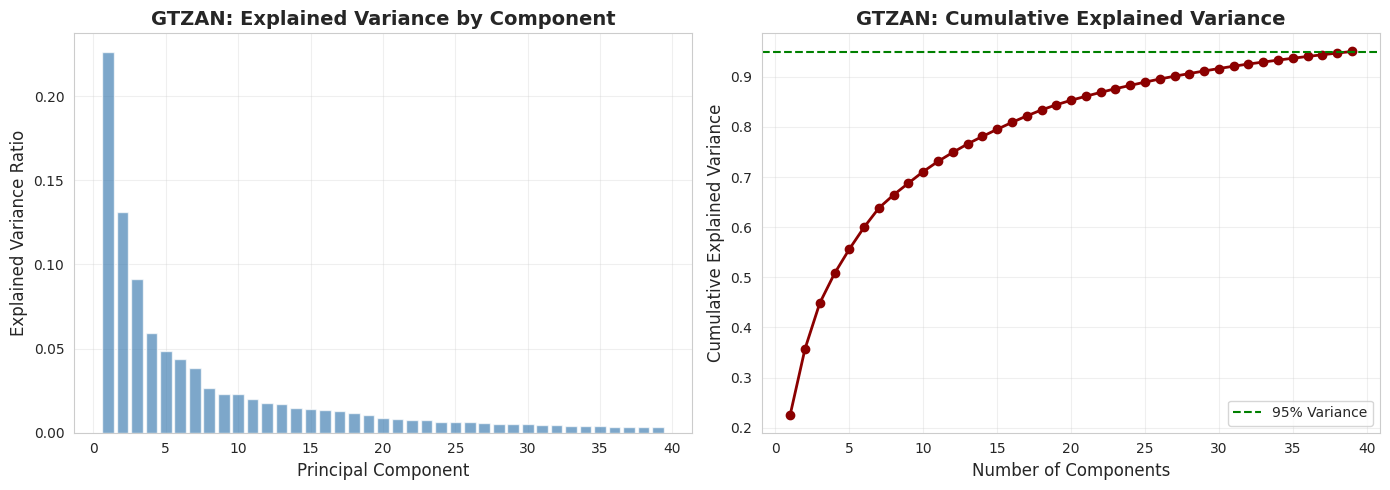

  Components for 95% variance: 39

Generating explained variance plot for FMA Small...


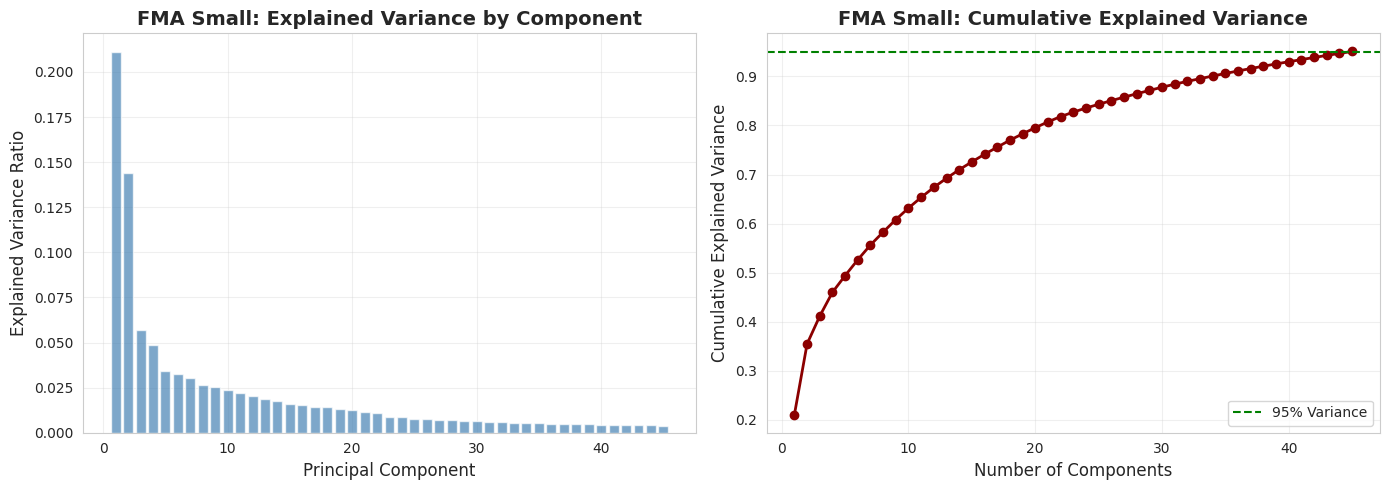

  Components for 95% variance: 45

Generating explained variance plot for FMA Medium...


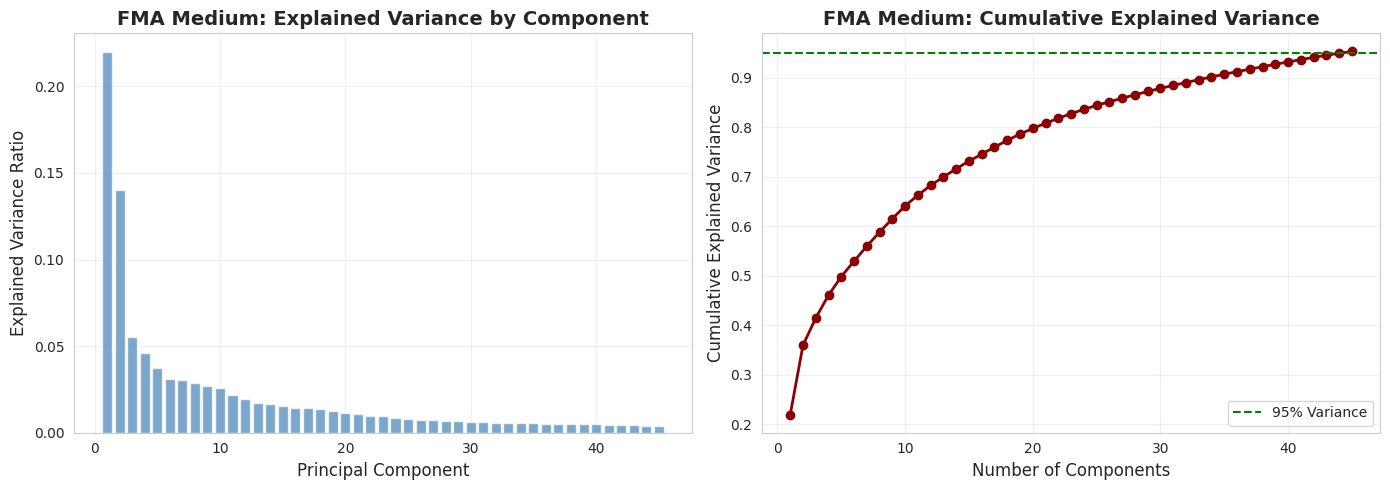

  Components for 95% variance: 45

Generating explained variance plot for Indian Music...


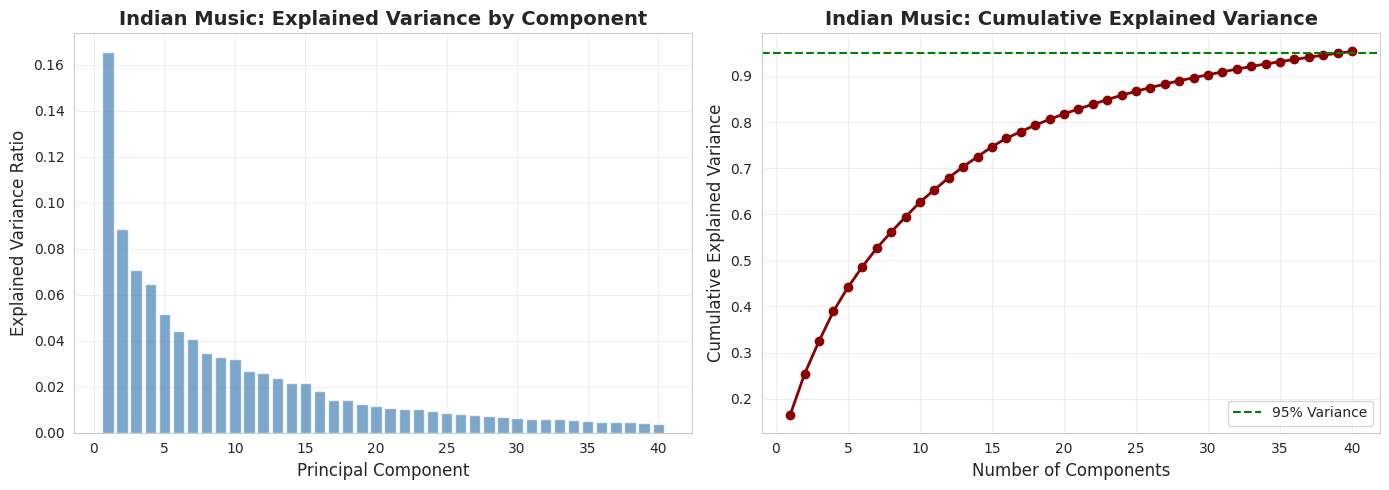

  Components for 95% variance: 40


In [6]:
# Generate explained variance plots for all datasets
for key, result in pca_results.items():
    config = datasets[key]
    print(f"\nGenerating explained variance plot for {config['name']}...")
    cumsum = plot_explained_variance(result['model'], config['name'], pca_output_dir)
    
    # Find number of components for 95% variance
    n_components_95 = np.argmax(cumsum >= 0.95) + 1
    print(f"  Components for 95% variance: {n_components_95}")

## Visualizations: 2D PCA Plots


Generating 2D PCA plot for GTZAN...


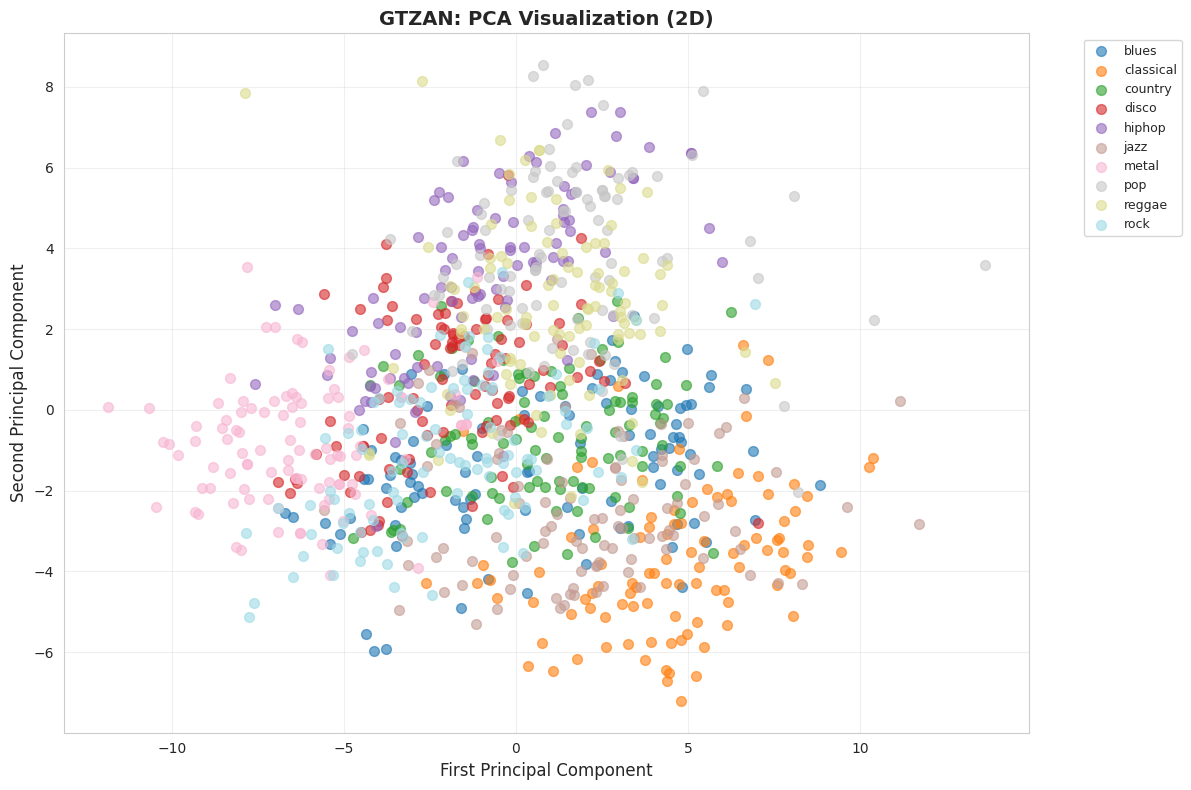


Generating 2D PCA plot for FMA Small...


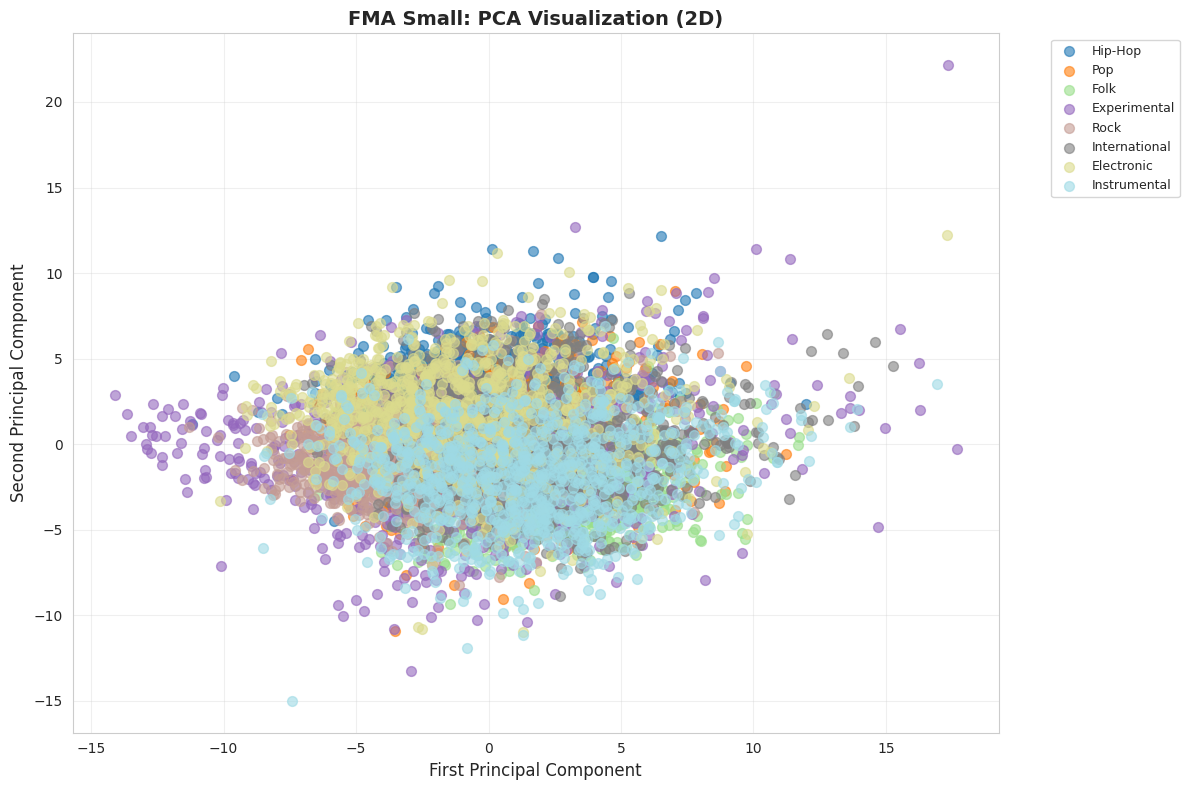


Generating 2D PCA plot for FMA Medium...


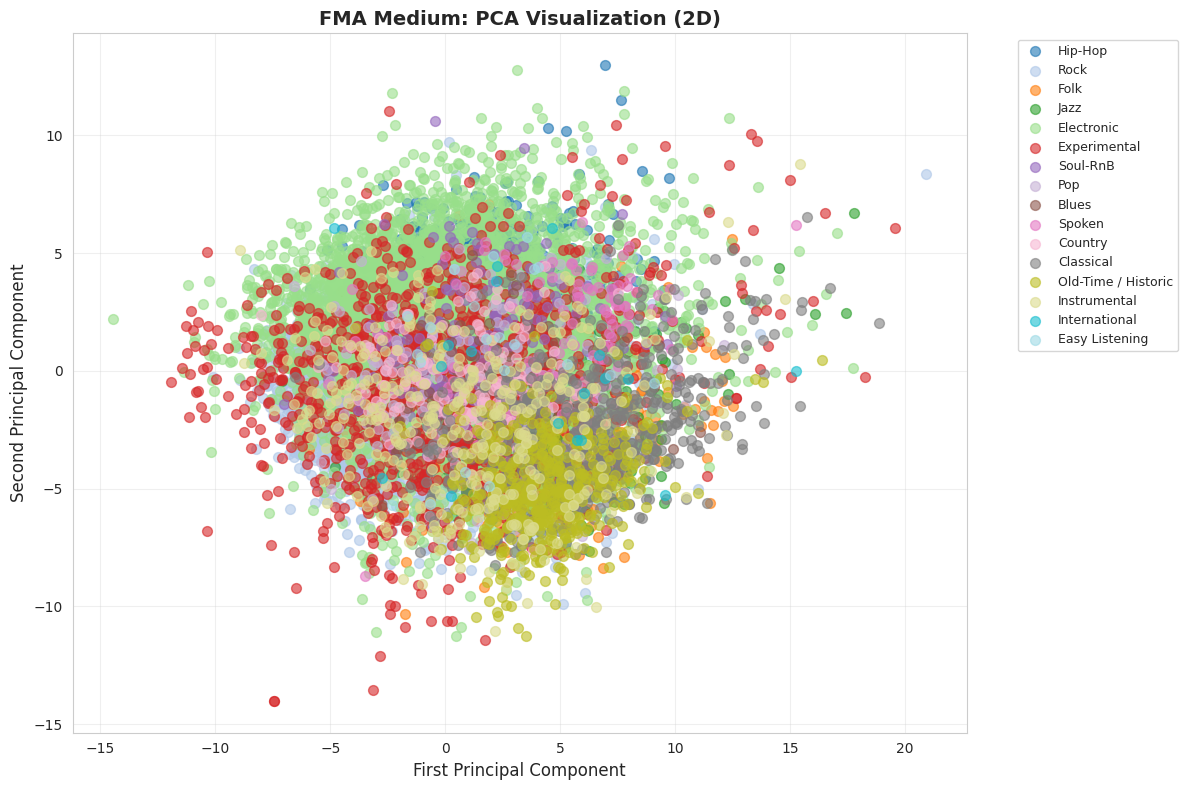


Generating 2D PCA plot for Indian Music...


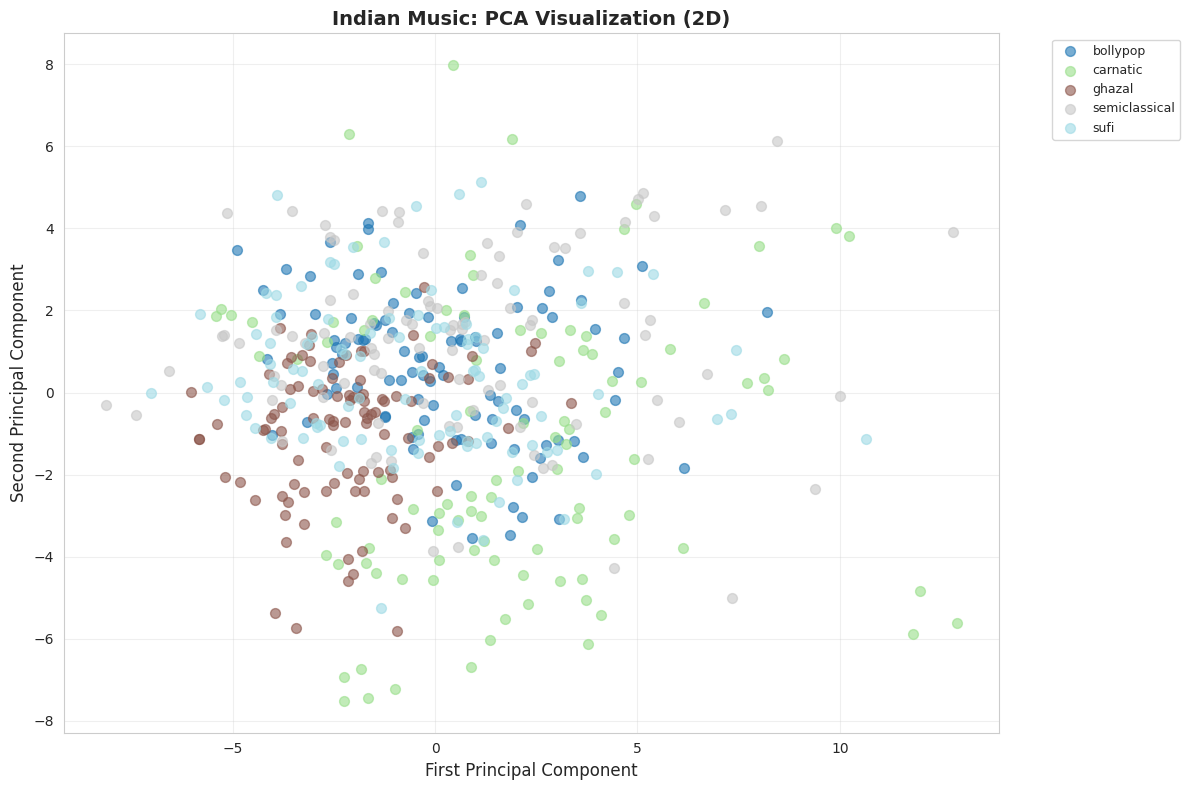

In [7]:
# Generate 2D PCA visualizations
for key, result in pca_results.items():
    config = datasets[key]
    print(f"\nGenerating 2D PCA plot for {config['name']}...")
    plot_pca_2d(result['data'], result['labels'], config['name'], pca_output_dir)

## Visualizations: 3D PCA Plots


Generating 3D PCA plot for GTZAN...


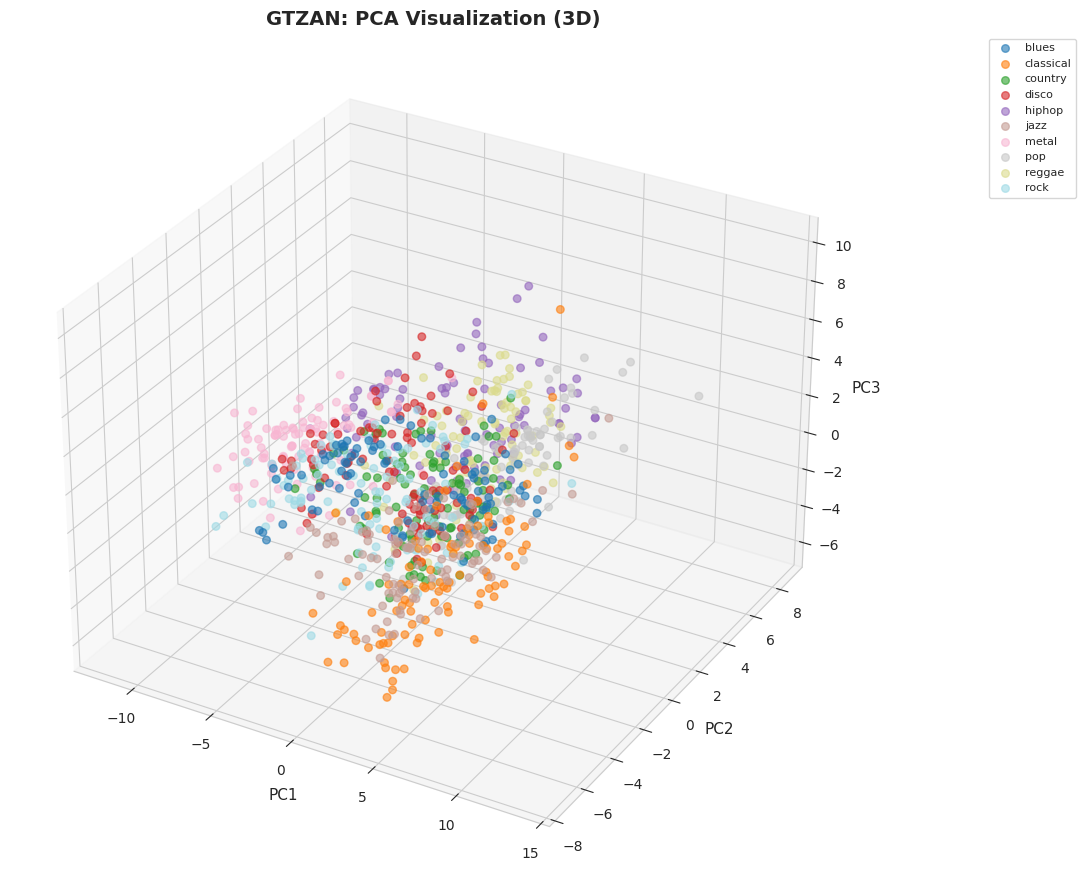


Generating 3D PCA plot for FMA Small...


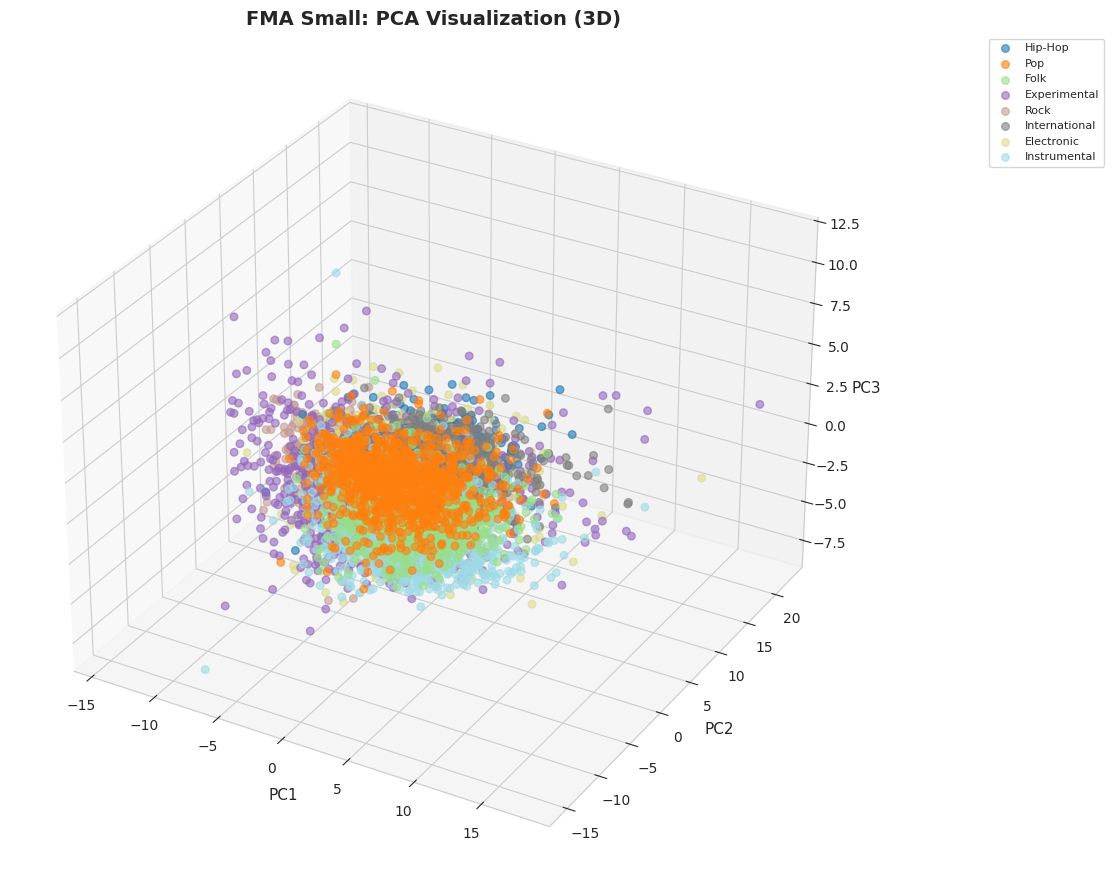


Generating 3D PCA plot for FMA Medium...


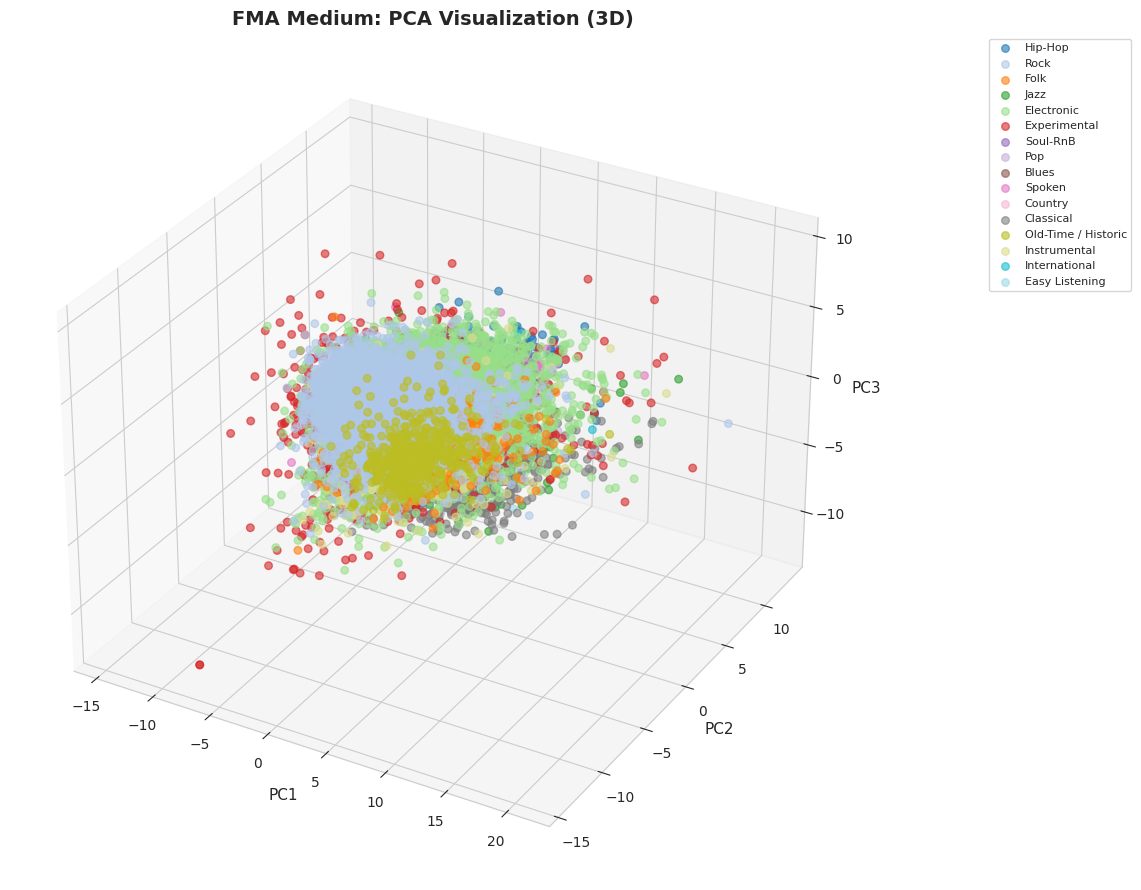


Generating 3D PCA plot for Indian Music...


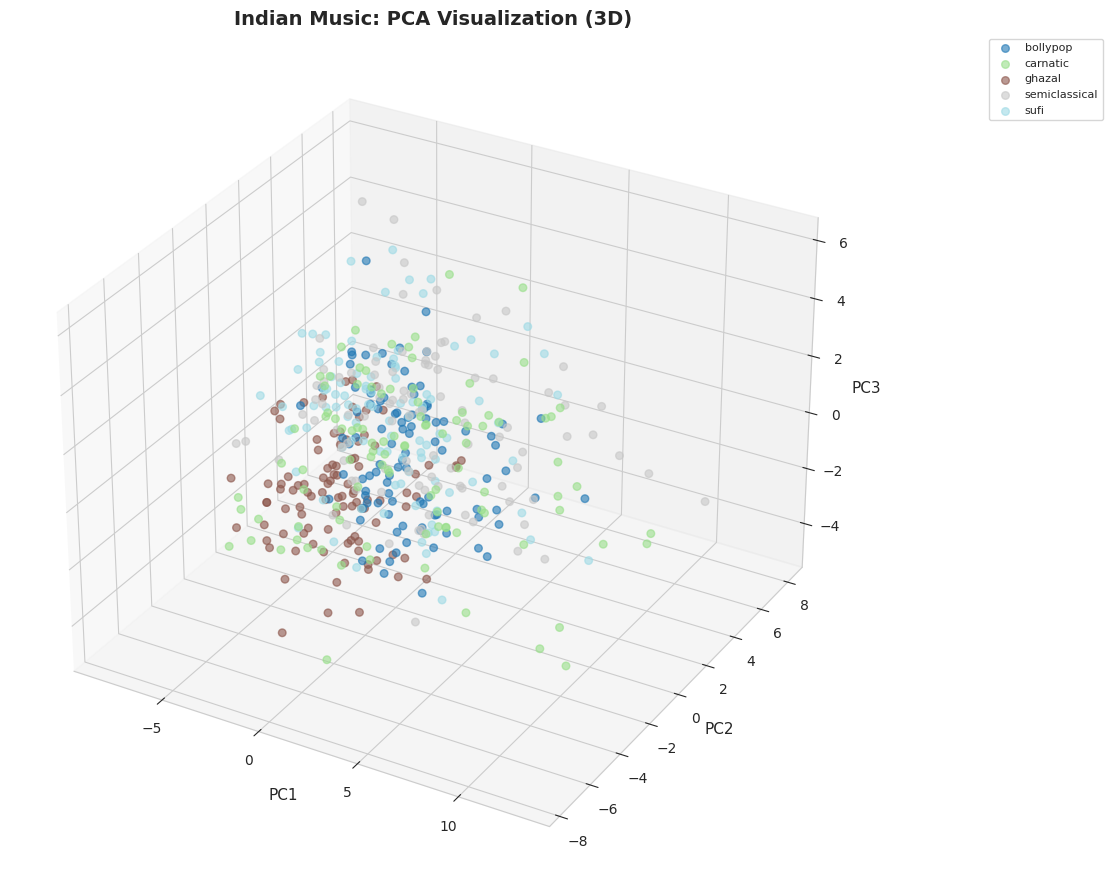

In [8]:
# Generate 3D PCA visualizations
for key, result in pca_results.items():
    config = datasets[key]
    print(f"\nGenerating 3D PCA plot for {config['name']}...")
    plot_pca_3d(result['data'], result['labels'], config['name'], pca_output_dir)

## Summary Report

In [9]:
# Create summary report
summary_data = []

for key, result in pca_results.items():
    config = datasets[key]
    summary_data.append({
        'Dataset': config['name'],
        'Original Features': result['original_shape'][1],
        'Samples': result['original_shape'][0],
        'PCA Components': result['reduced_shape'][1],
        'Variance Retained': f"{result['model'].explained_variance_ratio_.sum() * 100:.2f}%",
        'Reduction Ratio': f"{(1 - result['reduced_shape'][1] / result['original_shape'][1]) * 100:.1f}%"
    })

summary_df = pd.DataFrame(summary_data)
print("\n" + "="*80)
print("PCA DIMENSIONALITY REDUCTION SUMMARY")
print("="*80)
print(summary_df.to_string(index=False))
print("="*80)

# Save summary
summary_file = f'{pca_output_dir}pca_summary_report.csv'
summary_df.to_csv(summary_file, index=False)
print(f"\n✓ Summary saved to: {summary_file}")

# Create detailed text report
report_file = f'{pca_output_dir}pca_analysis_report.txt'
with open(report_file, 'w') as f:
    f.write("="*80 + "\n")
    f.write("PCA DIMENSIONALITY REDUCTION - DETAILED REPORT\n")
    f.write("="*80 + "\n\n")
    
    for key, result in pca_results.items():
        config = datasets[key]
        f.write(f"\n{config['name']}:\n")
        f.write("-" * 60 + "\n")
        f.write(f"Original dimensions: {result['original_shape'][1]} features\n")
        f.write(f"Reduced dimensions: {result['reduced_shape'][1]} components\n")
        f.write(f"Number of samples: {result['original_shape'][0]}\n")
        f.write(f"Total variance explained: {result['model'].explained_variance_ratio_.sum():.6f}\n")
        f.write(f"Variance retained: {result['model'].explained_variance_ratio_.sum() * 100:.2f}%\n")
        f.write(f"\nTop 5 Principal Components:\n")
        for i in range(min(5, len(result['model'].explained_variance_ratio_))):
            f.write(f"  PC{i+1}: {result['model'].explained_variance_ratio_[i]:.6f} ")
            f.write(f"({result['model'].explained_variance_ratio_[i] * 100:.2f}%)\n")
        f.write("\n")

print(f"✓ Detailed report saved to: {report_file}")

print("\n" + "="*80)
print("✓ PCA ANALYSIS COMPLETE!")
print("="*80)


PCA DIMENSIONALITY REDUCTION SUMMARY
     Dataset  Original Features  Samples  PCA Components Variance Retained Reduction Ratio
       GTZAN                 69      999              39            95.05%           43.5%
   FMA Small                 70     7997              45            95.07%           35.7%
  FMA Medium                 70    16988              45            95.29%           35.7%
Indian Music                 69      500              40            95.30%           42.0%

✓ Summary saved to: ../results/pca/pca_summary_report.csv
✓ Detailed report saved to: ../results/pca/pca_analysis_report.txt

✓ PCA ANALYSIS COMPLETE!
